# Taller Robot Delta

**Facultad de Ingeniería Mecánica - Universidad Pontificia Bolivariana - Medellín - Colombia**

## Objetivo
- programar el robot delta de la UPB para realizar la trayectoria indicada sobre el plano de trabajo especificado, representando una actividad de mecanizado CNC.

## Dinámica del ejercicio

Cada estudiante recibirá una trayectoria específica con las dimensiones de una pieza a fabricar por corte CNC. Deberá generar los archivos necesarios para que el robot Delta de la UPB haga los movimientos necesarios para cortar la pieza correctamente. Esto implica que el robot debe:
- iniciar el movimiento desde la posición HOME,
- desplazarse a un punto cualquiera de la pieza para iniciar el corte en el plano de trabajo $Z = -600$ mm,
- si debe posicionarse en otra parte de la pieza, por ejemplo para hacer ranuras, debe desplazarse primero a un plano seguro, de manera que no la corte en lugares prohibidos. Dicho plano seguro está ubicado en $Z = -580$ mm


## Entregables
- Archivo binario "trayectoria" generado por el módulo "pickle" de Python. En los ejemplos realizados en clase se muestra cómo generar este archivo:

```python
import pickle
with open("trayectoria", "wb") as f:
    pickle.dump([[txv],[tyv],[tzv]], f)
```

- Archivo "angulos.csv" (valores separados por comas) con los ángulos necesarios para ejecutar la trayectoria completa. En los ejemplos realizados en clase se muestra cómo generar este archivo:

```python
    np.savetxt("angulos.csv", datos,fmt='%.3f', delimiter=",")
```

- (opcional) cuaderno con la generación de trayectoria

Los archivos que deben entregar suelen estar en la carpeta donde tengan los cuadernos de trayectoria y solución al análisis cinemático inverso:

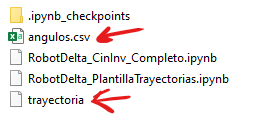

Cualquier error de lectura en estos archivos anula el correspondiente item en la rúbrica, ¡revise con cuidado los archivos antes de enviarlos!

## Restricciones

- Los ángulos generados en el archivo "angulos.csv" **DEBEN ESTAR EN DENTRO DEL RANGO DE MOVIMIENTO [-85°, -20°], SI SE SALE DE ESTE RANGO EL PROGRAMA NO SE PODRÁ EJECUTAR**
- Debe generar posiciones angulares para los tres motores $\theta_1,\theta_2,\theta_3$. Si falta algún ángulo, el programa no se podrá ejecutar.
- **Distancia mínima entre puntos**: la distancia mínima entre puntos debe ser de **5 mm**. Esto se puede calcular dividiendo el desplazamiento neto del movimiento por la distancia mínima, i.e., 5. En las plantillas recomendadas podrá encontrar funciones que implementan este cálculo.
    - Si no tiene claro cómo determinar esto, puede suponer un número de posiciones por tanteo, verificando que la distancia entre puntos no supere los 5 mm.

## Recomentaciones

La principal recomendación es que parta de las plantillas que se muestran a continuación:

1. Plantilla de trayectorias: 

https://colab.research.google.com/drive/1NDTj8m2J0Brvzv9Wf14LwZ1VCozatieL?usp=sharing

2. Cinemática inversa para un solo brazo (COMPLETAR): 

https://colab.research.google.com/drive/1oPgzYH3UPBZR47DlXAyAWAY7bPqTKih7?usp=sharing

Para descargar las plantillas, clic derecho en el siguiente botón:

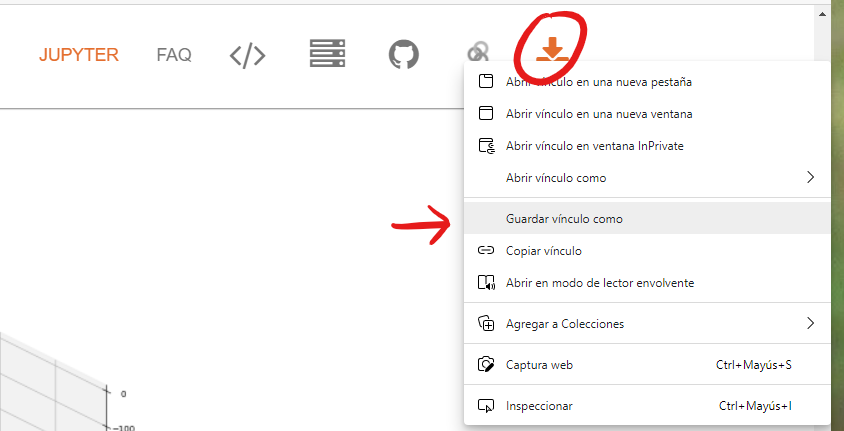

### Ejemplo

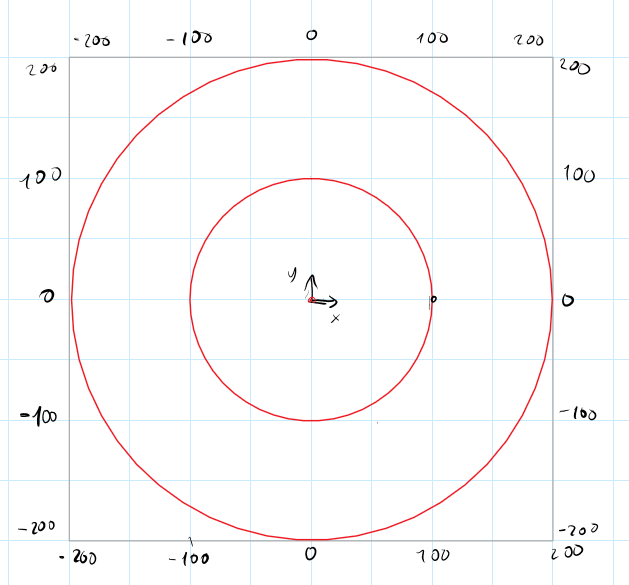

Aquí se muestra un disco de 200 mm de radio con un agujero de 100 mm de radio en el centro.

A continuación se muestra una posible trayectoria que puede seguir el robot para cortar esta pieza:

![VistaISO](EjemploArandela_ISO.gif "Vista ISO")

*Abrir aquí si no se visualiza bien: https://upbeduco-my.sharepoint.com/personal/luismiguel_aristizabal_upb_edu_co/Documents/_COMPARTIR/Delta/EjemploArandela_ISO.gif*

El robot inicia en la posición HOME. Al finalizar los cortes regresa a este punto.

En esta pieza se tienen dos líneas independientes, lo cual requiere un desplazamiento de la herramienta sobre un plano seguro ubicado en $Z = -580 mm$. Observe con atención que la base móvil del robot se ubica en el plano seguro una vez termina de hacer el corte de la circunferencia mayor, para poder desplazarse hacia un punto cualquiera de la circunferencia menor:

![VistaFront](EjemploArandela_Front.gif "Vista Frontal")

*Abrir aquí si no se visualiza bien: https://upbeduco-my.sharepoint.com/personal/luismiguel_aristizabal_upb_edu_co/Documents/_COMPARTIR/Delta/EjemploArandela_ISO.gif*

## Trayectorias a asignar

A continuación se generará una lista aleatoria con base en los estudiantes inscritos.

**Busque su nombre usando el cuadro de búsqueda de su navegador (Ctrl+F)**

In [1]:
%reset -sf

import glob,random,pickle
from IPython.display import Image, display
import pandas as pd
import os.path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

if os.path.isfile('estudiantes'):
    print ("Leyendo lista de estudiantes")
    with open("estudiantes", "rb") as f:
        randEst = pickle.load(f)
else:
    print ("Creando lista aleatoria")
    
    estudiantes=pd.read_excel('Estudiantes.xlsx',index_col=None)
    randEst = estudiantes.values.T[0]
    matriz = []
    random.shuffle(randEst)
    with open("estudiantes", "wb") as f:
        pickle.dump(randEst, f)
print(randEst)

Creando lista aleatoria
['VARGAS DUQUE, SIMON' 'BULA PIÑERES, JOSE A.' 'DIAZ MADERA, EMANUEL'
 'ORTIZ ATHIAS, GUSTAVO J.' 'TAMARA NUÑEZ, VICTOR M.'
 'VERGARA HERNANDEZ, SEBASTIAN' 'RUIZ MAZO, SANTIAGO'
 'SOLANO SALAS, MARIA C.' 'DURAN PANIAGUA, SAMUEL'
 'DE LA HOZ CABALLERO, CARLOS I.' 'VILLEGAS ARANGO, JACOBO E.']


VARGAS DUQUE, SIMON  -  Caso01.png


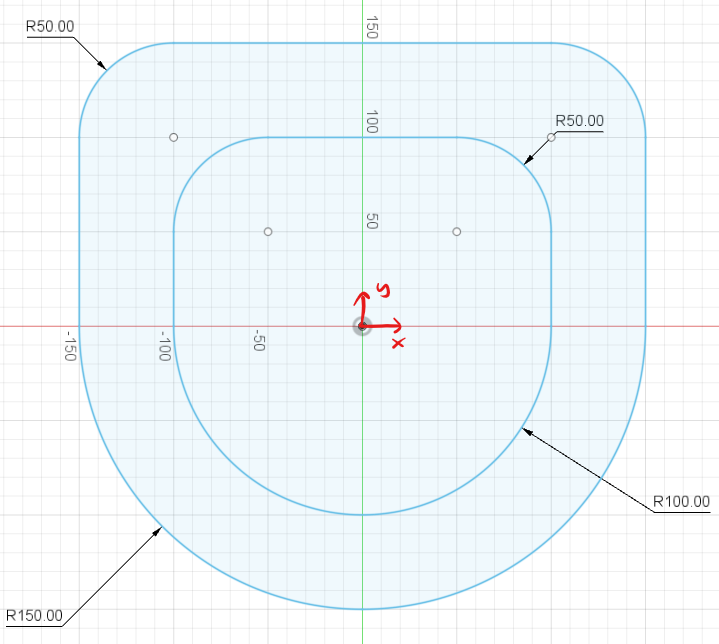

BULA PIÑERES, JOSE A.  -  Caso02.png


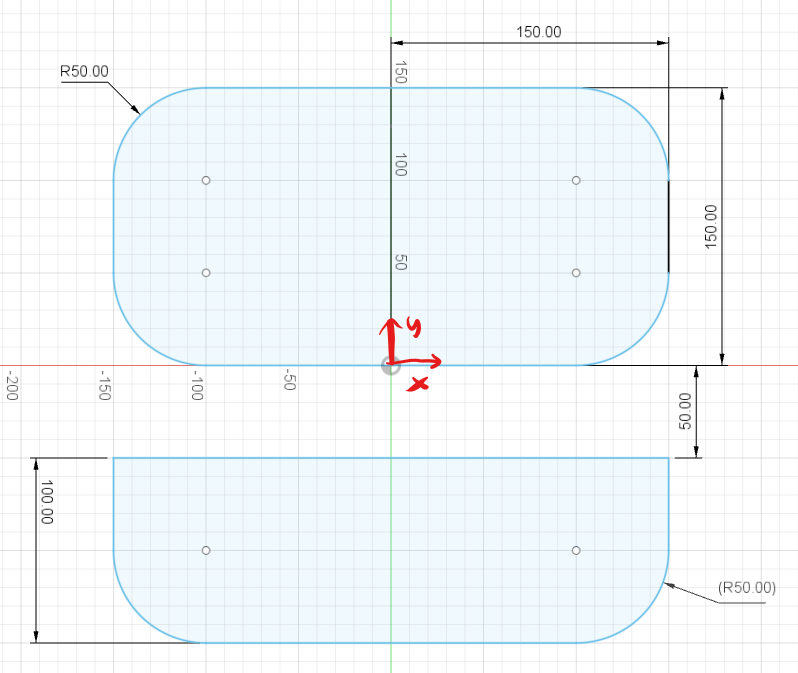

DIAZ MADERA, EMANUEL  -  Caso03.png


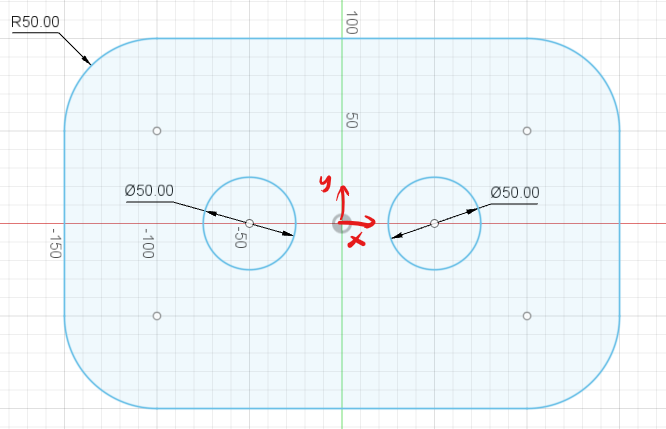

ORTIZ ATHIAS, GUSTAVO J.  -  Caso04.png


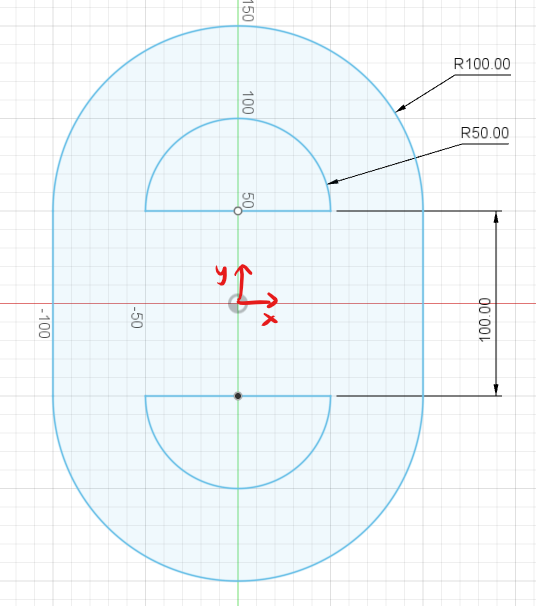

TAMARA NUÑEZ, VICTOR M.  -  Caso05.png


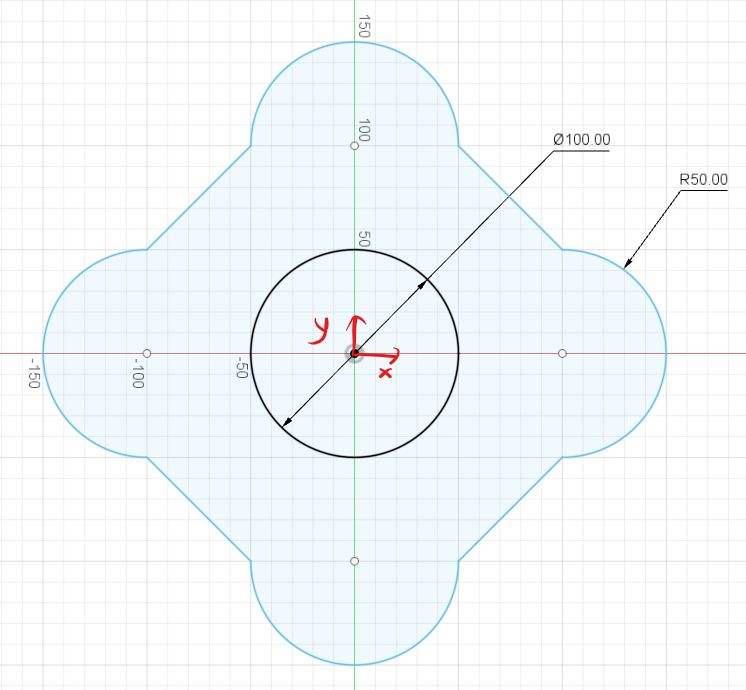

VERGARA HERNANDEZ, SEBASTIAN  -  Caso06.png


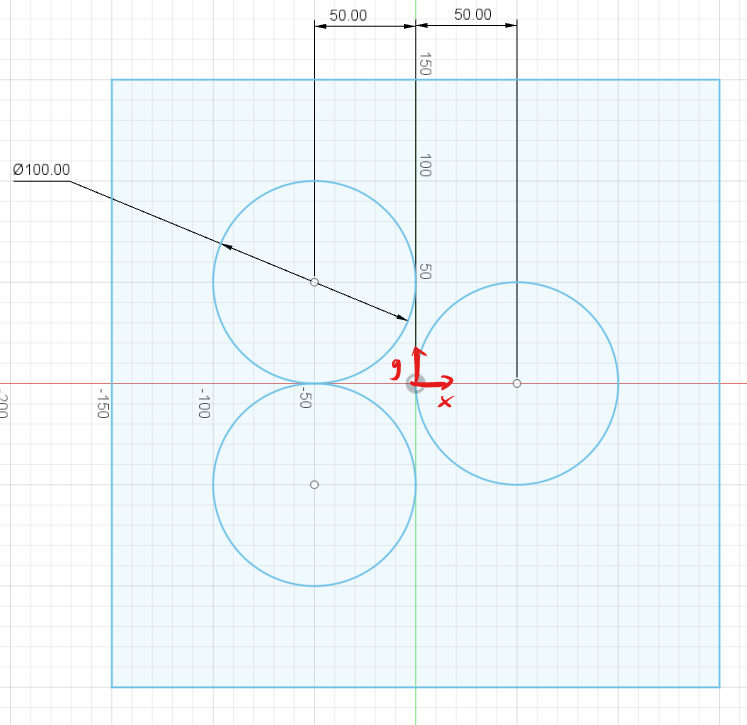

RUIZ MAZO, SANTIAGO  -  Caso07.png


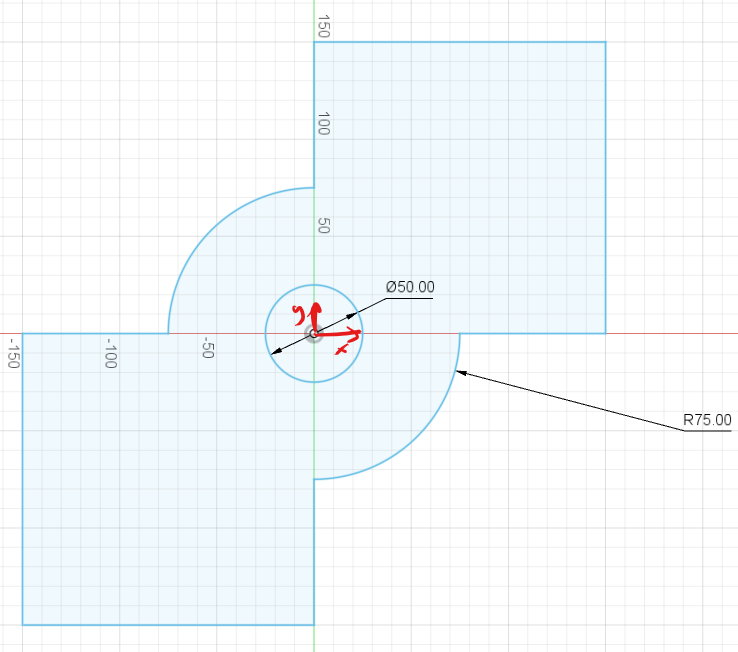

SOLANO SALAS, MARIA C.  -  Caso08.png


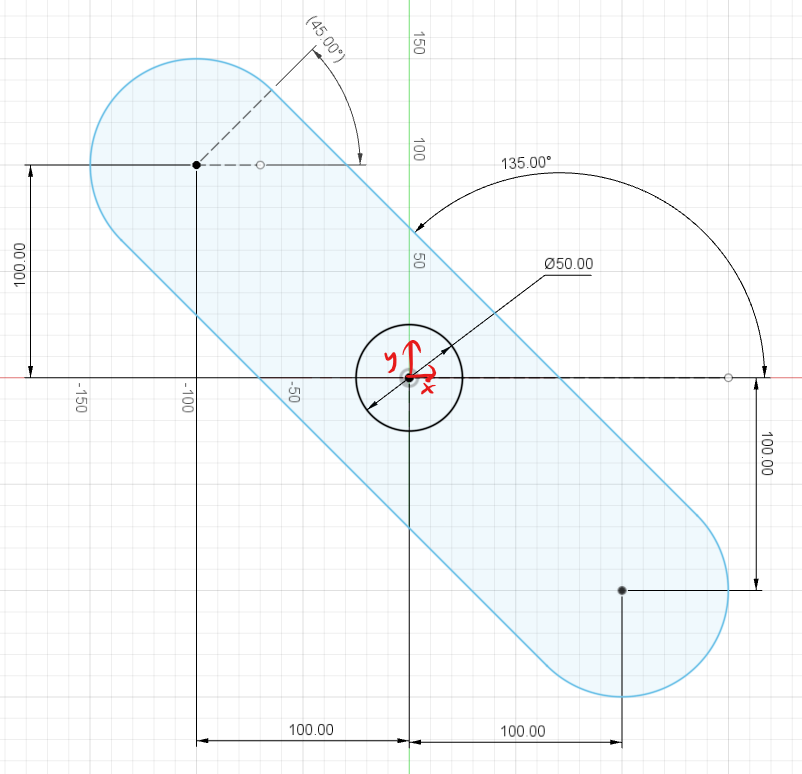

DURAN PANIAGUA, SAMUEL  -  Caso09.png


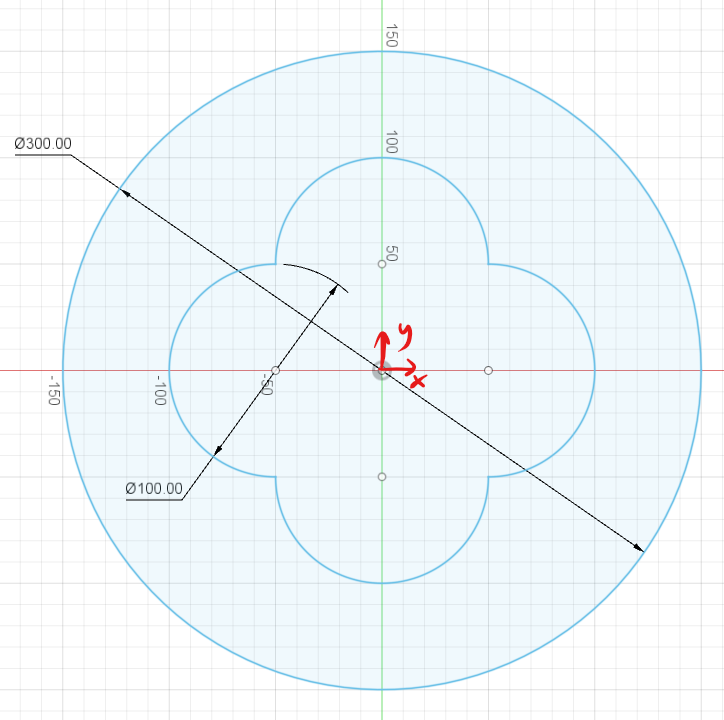

DE LA HOZ CABALLERO, CARLOS I.  -  Caso10.png


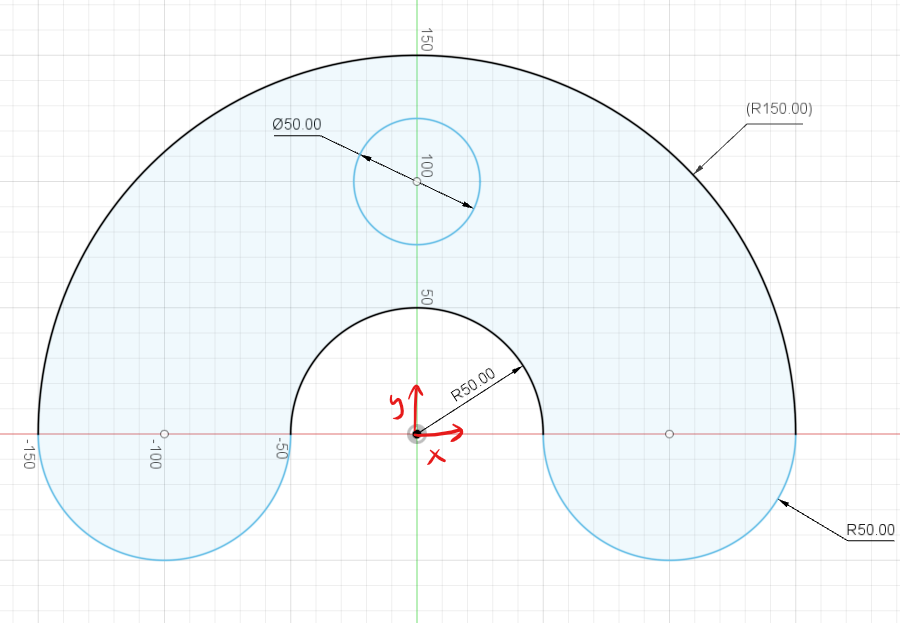

VILLEGAS ARANGO, JACOBO E.  -  Caso11.png


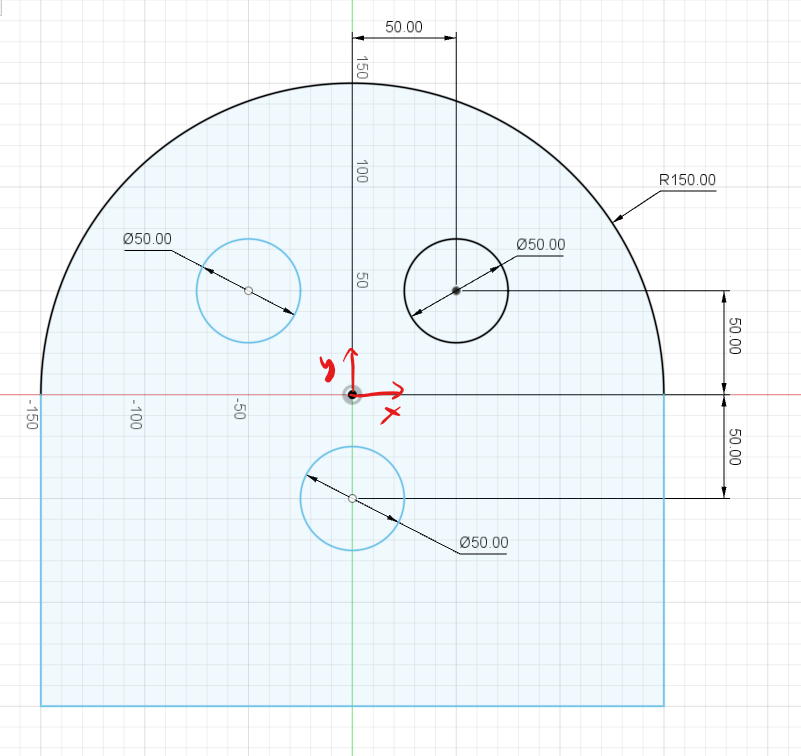

In [2]:
matriz = []
i = 0
for imageName in glob.glob('*.png'):
    if i == len(randEst):
        break
    matriz.append([randEst[i],imageName])
    print(matriz[-1][0]," - ",matriz[-1][1],)
    display(Image(filename=matriz[-1][1]))
    i = i+1

In [3]:
matrizDF = pd.DataFrame(data = matriz, columns = ["Nombre","Imagen"])
matrizDF.sort_values(by=['Nombre'])

,Nombre,Imagen
8,"BENAVIDEZ BENITEZ, SARA I.",Caso09.png
2,"BENITEZ SALCEDO, DONAL D.",Caso03.png
7,"CHARRY VADOS, DAVID S.",Caso08.png
11,"DUARTE ARBOLEDA, JUAN M.",Caso12.png
9,"GRACIANO MAZO, FRANK E.",Caso10.png
6,"JUCHT PINZON, JOSE L.",Caso07.png
10,"MOLINA LECOMPTE , EMILIO",Caso11.png
1,"PALACIO VASQUEZ, GIANFRANCO",Caso02.png
5,"PULGARIN MUÑOZ, MARIA A.",Caso06.png
3,"RODRIGUEZ MARULANDA, JOHANNA",Caso04.png


## Cuadernos útiles

Este taller requiere que el lector comprenda la teoría descrita en:

https://nbviewer.org/github/luismiguelaristi/MecanismosPythonUPB/blob/main/03a_Delta/01_Teoria/RobotDelta_Teoria.ipynb

y partimos de la solución desarrollada en:

https://nbviewer.org/github/luismiguelaristi/MecanismosPythonUPB/blob/main/03a_Delta/02_CinInversa/RobotDelta_CinInv.ipynb

En el siguente cuaderno puede revisar la teoría completa sobre trayectorias simples y compuestas:

https://nbviewer.org/github/luismiguelaristi/MecanismosPythonUPB/blob/main/03a_Delta/03_Trayectorias/RobotDelta_Trayectorias.ipynb